In [1]:
import os
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run "..//src//vgp_helper_fx_spectral"



In [2]:
ROOT_FOLDER = "D:\\VGP"

DATA_FOLDER = os.path.join(ROOT_FOLDER, "2P\\proc_s2p\\")
BEHAV_FOLDER = os.path.join(ROOT_FOLDER, "Bonsai\\")
METAFILE = os.path.join(ROOT_FOLDER, "Metafile_VGP2.4.xls")
rows, header = tp.metafilereader(METAFILE, sheetname="Analysis_KoolAid")


File is excel file. Making csv metafile first


In [3]:
# Goes through metafile assembling data from s2p files where possible

cell_data={}

for row in rows:
    try:
        key=row[0]+'_'+row[3]
        animal=row[0]
        day=row[2]
        date=int(row[1])
        events=row[6]
#         solution=row[3]
        
        s2p_folder = os.path.join(DATA_FOLDER,
                                  "sub-{}\\ses-{}-{}\\suite2p\\plane0"
                                  .format(animal, day, date))
        events_file =BEHAV_FOLDER+events
        
        
        cell_data[key] = assemble_data(s2p_folder,events_file)
        cell_data[key]['animal'] = row[0]
        cell_data[key]['diet'] = row[11]
        cell_data[key]['session'] = row[3]
        cell_data[key]['solution']=row[5]
        
    except FileNotFoundError:
        print('Cannot find file for', key)
     

Cannot find file for VGP118_P2
Cannot find file for VGP202_P2
Cannot find file for VGP203_C2
Cannot find file for VGP203_P2
Cannot find file for VGP204_P2
Cannot find file for VGP402_C1
Cannot find file for VGP403_C1
Cannot find file for VGP404_C1


In [4]:
mice=[]

for key in cell_data.keys(): 
    d=cell_data[key]
    mouseid=d['animal']
    if mouseid not in mice: mice.append(mouseid)

In [5]:
cell_data['VGP118_P1'].keys()

dict_keys(['animal', 'diet', 'solution', 'raw_F', 'neu_F', 'iscell', 'pump_snips_all', 'pump_responsive', 'lick_snips_all', 'lick_responsive', 'df_responsive', 'session'])

In [22]:
PR_pro=[]
PR_car=[]

animal=[]
for mouse in mice: 
    temp_PR=[]
    temp_PR2=[]
    
    for key in cell_data.keys():
        d=cell_data[key]
        
        if d['animal']==mouse and d['diet']=='PR' and d['session']=='P1': 
            snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
            temp_PR.append(np.mean(snips, axis=0))

            
        elif d['animal']==mouse and d['diet']=='PR' and d['session']=='C1': 
            snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1))
            temp_PR2.append(np.mean(snips, axis=0))            
            

    if len(temp_PR)>0:
        PR_pro.append(temp_PR)
    if len(temp_PR2)>0:
        PR_car.append(temp_PR2)

               

In [28]:
PR_P1_licks_act=[]
PR_P1_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='P1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_P1_licks_act.append(np.mean(lick_snips, axis=0))
        PR_P1_licks_inhib.append(np.mean(snips_in, axis=0))
        


#Filtering out empty arrays        
PR_P1_licks_inhib_f=[]        
for animal in PR_P1_licks_inhib: 
    if not np.isnan(animal).any(): 
        PR_P1_licks_inhib_f.append(animal)

In [34]:
PR_C1_licks_act=[]
PR_C1_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        PR_C1_licks_act.append(np.mean(lick_snips, axis=0))
        PR_C1_licks_inhib.append(np.mean(snips_in, axis=0))

        
#Filtering out empty arrays        
PR_C1_licks_inhib_f=[]        
for animal in PR_C1_licks_inhib: 
    if not np.isnan(animal).any(): 
        PR_C1_licks_inhib_f.append(animal)

In [38]:
NR_P1_licks_act=[]
NR_P1_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='P1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        NR_P1_licks_act.append(np.mean(lick_snips, axis=0))
        NR_P1_licks_inhib.append(np.mean(snips_in, axis=0))
        



In [42]:
NR_C1_licks_act=[]
NR_C1_licks_inhib=[]


animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':
        lick_snips=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==1)],axis=1)) 
        snips_in=(np.mean(d['lick_snips_all'][np.where(d['lick_responsive']==-1)],axis=1))
        NR_C1_licks_act.append(np.mean(lick_snips, axis=0))
        NR_C1_licks_inhib.append(np.mean(snips_in, axis=0))
        
        
        


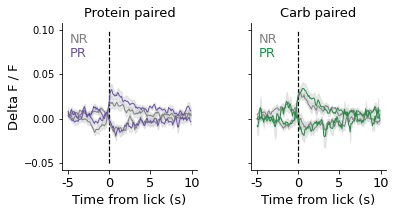

In [71]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.2, left=0.1, right=0.85)


tp.shadedError(ax[0], NR_P1_licks_act, linecolor="grey")
tp.shadedError(ax[0], NR_P1_licks_inhib, linecolor="grey")

tp.shadedError(ax[0], PR_P1_licks_act, linecolor="#6a51a3")
tp.shadedError(ax[0], PR_P1_licks_inhib_f, linecolor="#6a51a3")




tp.shadedError(ax[1], NR_C1_licks_act, linecolor="grey")
tp.shadedError(ax[1], NR_C1_licks_inhib, linecolor="grey")

tp.shadedError(ax[1], PR_C1_licks_act, linecolor="#238b45")
tp.shadedError(ax[1], PR_C1_licks_inhib_f, linecolor="#238b45")



ax[0].text(2, 0.085, "NR", color="grey",size=13)
ax[0].text(2, 0.07, "PR", color="#6a51a3",size=13)

ax[1].text(2, 0.085, "NR", color="grey",size=13)
ax[1].text(2, 0.07, "PR", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)

ax[0].set_title('Protein paired', size=13)
ax[1].set_title('Carb paired', size=13)



f.savefig("..//output//licksnips_Koolaid.png")


### making heatmap of all cells 

In [80]:
from itertools import chain

snips_PR_pro=[]
act_PR_pro=[]
in_PR_pro=[]

snips_PR_carb=[]
act_PR_carb=[]
in_PR_carb=[]

snips_NR_pro=[]
act_NR_pro=[]
in_NR_pro=[]

snips_NR_carb=[]
act_NR_carb=[]
in_NR_carb=[]
for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='P1':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_PR_pro.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_pro.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_pro.append(np.mean(cell, axis=0))
            
    elif d['diet']=='PR' and d['session']=='C1':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_PR_carb.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_PR_carb.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_PR_carb.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='P1':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_pro.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_pro.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_pro.append(np.mean(cell, axis=0))
            
    elif d['diet']=='NR' and d['session']=='C1':
        snips=d['lick_snips_all']
        act_snips=d['lick_snips_all'][np.where(d['lick_responsive']==1)]
        in_snips=d['lick_snips_all'][np.where(d['lick_responsive']==-1)]

        for cell in snips:
            snips_NR_carb.append(np.mean(cell, axis=0))
        for cell in act_snips: 
            act_NR_carb.append(np.mean(cell, axis=0))
        for cell in in_snips: 
            in_NR_carb.append(np.mean(cell, axis=0))

        
        


In [81]:
arrays= snips_NR_carb
subset_values= [arr[50:71] for arr in arrays]
subset_mean=[np.mean(subset) for subset in subset_values]
sorted_NR_carb= [arr for _, arr in sorted(zip(subset_mean,arrays), key=lambda x: np.mean(x[1][50:71]),reverse=True)]

In [82]:
arrays= snips_NR_pro
subset_values= [arr[50:71] for arr in arrays]
subset_mean=[np.mean(subset) for subset in subset_values]
sorted_NR_pro= [arr for _, arr in sorted(zip(subset_mean,arrays), key=lambda x: np.mean(x[1][50:71]),reverse=True)]

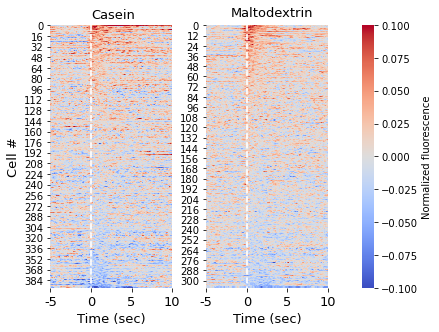

In [84]:
f, ax = plt.subplots(figsize=(6,5),ncols=3, gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = sorted_NR_pro

y2 = sorted_NR_carb

sns.heatmap(y1, ax = ax[0],
            cbar_ax=ax[2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y2, ax = ax[1], 
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm')
           )



ax[0].text(50,-10, "Casein", size=13)
ax[0].vlines([50],0,775, color="white", linestyle="--",lw=1.7)

ax[1].text(30,-10, "Maltodextrin", size=13)
ax[1].vlines([50],0,950, color="white", linestyle="--",lw=1.7)

for axis in [ax[0], ax[1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)

ax[0].set_ylabel("Cell #", size=13)
# ax[0].set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32])
# ax[0].set_yticklabels([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32],size=11)


# ax[2].set_ylabel("Delta F / F", size=12)


f.savefig("..//output//heatmap_allcells_Koolaid_NR.png")

In [ ]:
from operator import itemgetter

def sort_by_activity(arrays, start_index, end_index):
    subset_mean_sorted = sorted(((np.mean(arr[start_index:end_index]), arr) for arr in arrays), key=itemgetter(0), reverse=True)
    sorted_arrays = [arr for _, arr in subset_mean_sorted]
    return sorted_arrays

In [ ]:
#sorting by activity - PR cas activated
PR_act_cas=sort_by_activity(act_PR_cas,50,70)
PR_in_cas=sort_by_activity(in_PR_cas,50,70)


NR_act_cas=sort_by_activity(act_NR_cas,50,70)
NR_in_cas=sort_by_activity(in_NR_cas,50,70)


In [ ]:
f, ax = plt.subplots(figsize=(6,5),ncols=3,nrows=2 ,gridspec_kw={"width_ratios": [1,1,0.1]})
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.15, left=0.1, right=0.85)
cmax=0.1 #Maximum colormap

y1 = PR_act_cas
y2=NR_act_cas
y3 = PR_in_cas
y4 = NR_in_cas

sns.heatmap(y2, ax = ax[0][0],
            cbar_ax=ax[0][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'})

sns.heatmap(y1, ax = ax[0][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

sns.heatmap(y4, ax = ax[1][0], 
            cbar_ax=ax[1][2],
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            cbar_kws={'label': 'Normalized fluorescence'}
           )

sns.heatmap(y3, ax = ax[1][1],
            cbar=False,
            vmax=cmax, 
            vmin=-cmax,
            cmap=plt.get_cmap('coolwarm'),
            )

ax[0][0].text(75,-10, "NR", size=13)

ax[0][1].text(75,-10, "PR", size=13)

for axis in [ax[0][0], ax[0][1], ax[1][0], ax[1][1]]:
    axis.set_xticks([0,50,100,150])
    axis.set_xlabel("Time (sec)", size=13)
    axis.set_xticklabels(["-5", "0", "5", "10"], rotation=0, size=13)
    axis.vlines([50],0,150, color='black', linestyle='--', lw=1.7)

ax[0][0].set_ylabel("Activated \n cell#", size=13)
ax[1][0].set_ylabel("Inhibited \n cell#", size=13)


f.savefig("..//output//heatmap_allcells_Cas.png")

In [ ]:
f, ax = plt.subplots(figsize=(6,3),ncols=2, sharey=True)
f.subplots_adjust(wspace=0.4,hspace=0.5, bottom=0.2, left=0.1, right=0.85)

y1 = PR_act_cas
y2=NR_act_cas
y3 = PR_in_cas
y4 = NR_in_cas

tp.shadedError(ax[0], y2, linecolor="Gray")
tp.shadedError(ax[0], y4, linecolor="Gray")

tp.shadedError(ax[0], y1, linecolor="#6a51a3")
tp.shadedError(ax[0], y3, linecolor="#6a51a3")


tp.shadedError(ax[1], act_PR_malt, linecolor="#238b45")
tp.shadedError(ax[1], in_PR_malt, linecolor="#238b45")


tp.shadedError(ax[1], act_NR_malt, linecolor="Gray")
tp.shadedError(ax[1], in_NR_malt, linecolor="Gray")








ax[0].text(2, 0.1, "NR",color='Gray', size=13)
ax[0].text(2, 0.085, "PR", color="#6a51a3",size=13)

ax[1].text(2, 0.1, "NR",color='Gray', size=13)
ax[1].text(2, 0.085, "PR", color="#238b45",size=13)


for axis in ax:
    axis.set_xticks([0,50,100,150])
    axis.set_xticklabels(["-5", "0", "5", "10"],rotation=0, size=13)
    axis.set_yticks([-0.05, 0.0, 0.05,0.1])
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.vlines([50],-0.05,0.1, color="black", linestyle="--", linewidth=1.2)
    axis.set_xlabel("Time from lick (s)", size=13)


ax[0].set_ylabel("Delta F / F", size=13)
# ax[0].set_yticklabels([-0.6,-0.4,-0.2, 0.0,0.2, 0.4,0.6], size=12)


ax[0].set_title('Casein', size=13)
ax[1].set_title('Maltodextrin', size=13)


f.savefig("..//output//Singal_allcells.png")

## Pie Charts

In [ ]:
cols = ["data", "Cas", 'Malt']
df_resp_PR = pd.DataFrame(columns=cols)
df_resp_PR['Cas']=len(snips_PR_cas),len(PR_act_cas),len(PR_in_cas),len(snips_PR_cas)-(len(PR_act_cas)+len(PR_in_cas))
df_resp_PR['Malt']=len(snips_PR_malt),len(act_PR_malt),len(in_PR_malt),len(snips_PR_malt)-(len(act_PR_malt)+len(in_PR_malt))

df_resp_PR['data']='all_cells','lick_activated', 'lick_inhibited','non-responsive'


In [ ]:
cols = ["data", "Cas", 'Malt']
df_resp_NR = pd.DataFrame(columns=cols)
df_resp_NR['Cas']=len(snips_NR_cas),len(NR_act_cas),len(NR_in_cas),len(snips_NR_cas)-(len(NR_act_cas)+len(NR_in_cas))
df_resp_NR['Malt']=len(snips_NR_malt),len(act_NR_malt),len(in_NR_malt),len(snips_NR_malt)-(len(act_NR_malt)+len(in_NR_malt))

df_resp_NR['data']='all_cells','lick_activated', 'lick_inhibited','non-responsive'


In [ ]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(6,4), ncols=2, gridspec_kw={"wspace":0.5})


ax1.pie(df_resp_NR.Cas[1:4], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_NR.Malt[1:4], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Cas", size=13)
ax2.set_title("Malt", size=13)

f.savefig("..//output//Pie_NR.png")

In [ ]:
pie_colors = ['#b2df8a','#a6cee3','lightgrey']
labels = ['Act','Inh','Non-resp']

f, [ax1, ax2] = plt.subplots(figsize=(6,4), ncols=2, gridspec_kw={"wspace":0.5})


ax1.pie(df_resp_PR.Cas[1:4], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax2.pie(df_resp_PR.Malt[1:4], labels=labels, autopct='%1.1f%%',
    startangle=90, colors=pie_colors,labeldistance=1.1,textprops={'fontsize': 10})

ax1.set_title("Cas", size=13)
ax2.set_title("Malt", size=13)

f.savefig("..//output//Pie_PR.png")

In [ ]:
cols = ["animal", "diet", "session","solution", "lick_activated"]
df_activated = pd.DataFrame(columns=cols)

for key, d in cell_data.items():
    percent_act = d["df_responsive"].loc["lick_all", "responsive"] / np.sum(d["df_responsive"].loc['pump_only':'neither',"activated"]) * 100
    data = np.array([d["animal"], d["diet"], d["session"], d["solution"],percent_act])
    df_temp = pd.DataFrame({col: value for col, value in zip(cols, data)},
                          index=[key.split("_")[0]]).astype({'lick_activated':'float'})
    

    df_activated = pd.concat([df_activated, df_temp])
df_activated


In [ ]:
df_pref = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
                         aggfunc="mean")
             .astype({"C3": "float", "M3": "float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
             .assign(pref1=lambda df_: df_.C3 - df_.M3)
           .assign(pref2=lambda df_: df_.C6 - df_.M6)

           
            )


In [ ]:
df_session = (df_activated.pivot_table(index=["animal", "diet"],
                         columns=["session"],
                         values="lick_activated",
#                          aggfunc="mean"
                                 )
             .astype({"C1": "float", 'C2':"float","C3":"float","M1": "float","M2":"float", "M3":"float"})
#              .assign(pref=lambda df_: df_.cas / (df_.cas + df_.malt))
        )

Dataframes for each group (NR and PR) Casein and maltodextrin activated cells

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Cas")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

df_NR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Malt")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PR", "PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR_cas = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Cas")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)

df_PR_malt = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="Malt")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR,
         PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NR", "NRPR"])
 .dropna()
)



Figure for cells activated by casein and maltodextrin

In [ ]:
NR_cas=[]
NRPR_cas=[]
for row in df_NR_cas.iterrows():
    NR_cas.append(row[1].NR)
    NRPR_cas.append(row[1].NRPR)

NR_malt=[]
NRPR_malt=[]
for row in df_NR_malt.iterrows():
    NR_malt.append(row[1].NR)
    NRPR_malt.append(row[1].NRPR)
    
    
PR_cas=[]
PRNR_cas=[]
for row in df_PR_cas.iterrows():
    PR_cas.append(row[1].PR)
    PRNR_cas.append(row[1].PRNR)

PR_malt=[]
PRNR_malt=[]
for row in df_PR_malt.iterrows():
    PR_malt.append(row[1].PR)
    PRNR_malt.append(row[1].PRNR)

    

colors_1=['#af8dc3', '#762a83','#762a83','#af8dc3']
colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)

tp.barscatter([[NR_cas,NRPR_cas],[PR_cas,PRNR_cas]], 
              paired= True,
              barfacecolor=colors_1,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_malt,NRPR_malt],[PR_malt,PRNR_malt]], 
              paired= True,
              barfacecolor=colors_M,
              barfacecolor_option="individual",
              barlabels=['NR', 'NRPR', 'PR', 'PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)

ax[0].set_ylabel('Lick responsive cells (%)',fontsize = 13)
ax[0].set_yticks([0,20,40,60,80])
ax[0].set_yticklabels([0,20,40,60,80], fontsize = 13)

ax[1].set_ylabel('Lick responsive cells (%)',fontsize = 13)
ax[1].set_yticks([0,20,40,60,80])
ax[1].set_yticklabels([0,20,40,60,80], fontsize = 13)


ax[0].set_title('Casein', fontsize =15)
ax[1].set_title('Maltodextrin', fontsize =15)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\%_lick_activated_cells.png')

Dataframes for each group (NR and PR) Preferense

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Making dataframe for NR-NRPR group
df_NR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(NR=lambda df_:df_.NR)
 .drop(columns=["PR"])
 .dropna()
)

df_NRPR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(NRPR=lambda df_:df_.NRPR)
 .drop(columns=["PRNR"])
 .dropna()
)

# Making dataframe for PR-PRNR group
df_PR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref1")
#  .fillna(0)
 .assign(PR=lambda df_:df_.PR)
 .drop(columns=["NR"])
 .dropna()
)


df_PRNR = (df_pref
 .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref2")
#  .fillna(0)
 .assign(PRNR=lambda df_:df_.PRNR)
 .drop(columns=["NRPR"])
 .dropna()
)
# print(df_NR)
# print(df_PR)


pref_NR=[]
for row in df_NR.iterrows():
    pref_NR.append(row[1].NR)
    
pref_PR=[]
for row in df_PR.iterrows():
    pref_PR.append(row[1].PR)

    
pref_NRPR=[]
for row in df_NRPR.iterrows():
    pref_NRPR.append(row[1].NRPR)
    
pref_PRNR=[]
for row in df_PRNR.iterrows():
    pref_PRNR.append(row[1].PRNR)
    

Figure for proportion of cells activated by casin - malodextrin

In [ ]:
f, ax = plt.subplots(figsize=(4,4))
f.subplots_adjust(wspace=0.15,hspace=0.35, bottom=0.15, left=0.3)


x1 = [1,2]
x2=[3,4]

for row in zip(pref_NR,pref_NRPR):
    y=row
    ax.plot(x1, y, color="grey")
    ax.scatter(x1, y, s=150, color=["#af8dc3", "#762a83"], zorder=20, alpha=0.8)

for row in zip(pref_PR,pref_PRNR):
    y=row
    ax.plot(x2, y, color="grey")
    ax.scatter(x2, y, s=150, color=["#762a83", "#af8dc3"], zorder=20, alpha=0.8)

  
    
ax.bar(x1, [np.mean(pref_NR),np.mean(pref_NRPR)], width=0.7, zorder=-1, color="lightgrey")
ax.bar(x2, [np.mean(pref_PR),np.mean(pref_PRNR)], width=0.7, zorder=-1, color="lightgrey")
    
ax.set_ylabel("Proportion of cells responsive \n to casein vs maltodextrin", size=13)
ax.set_yticks([-40,-20,0,20,40])
ax.set_yticklabels(['-40','-20','0','20','40'], size=13)

ax.set_xticks([1,2,3,4])
ax.set_xticklabels(["NR", 'NRPR','PR','PRNR'], size=13)
ax.set_xlim([0.4,4.6])

ax.axhline(0, color="k", linestyle="--", zorder=-1,lw=1.2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\pref_casein_cells.png')

In [ ]:
PR_C1_lick=[]
PR_C2_lick=[]
PR_C3_lick=[]

PR_M1_lick=[]
PR_M2_lick=[]
PR_M3_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PR' and d['session']=='C1':
        PR_C1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

    elif d['diet']=='PR' and d['session']=='C2':
        PR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR' and d['session']=='C3':
        PR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='PR'and d['session']=='M1':
        PR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR'and d['session']=='M2':
        PR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PR'and d['session']=='M3':
        PR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


len(PR_C3_lick)

In [ ]:
PRNR_C4_lick=[]
PRNR_C5_lick=[]
PRNR_C6_lick=[]

PRNR_M4_lick=[]
PRNR_M5_lick=[]
PRNR_M6_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='PRNR' and d['session']=='C4':
        PRNR_C4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

    elif d['diet']=='PRNR' and d['session']=='C5':
        PRNR_C5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PRNR' and d['session']=='C6':
        PRNR_C6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='PRNR'and d['session']=='M4':
        PRNR_M4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PRNR'and d['session']=='M5':
        PRNR_M5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='PRNR'and d['session']=='M6':
        PRNR_M6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)

In [ ]:
NR_C1_lick=[]
NR_C2_lick=[]
NR_C3_lick=[]

NR_M1_lick=[]
NR_M2_lick=[]
NR_M3_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NR' and d['session']=='C1':            
        lick_act=(len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))
        all_cells=len(d['lick_responsive'])
        NR_C1_lick.append(lick_act/all_cells*100)
    elif d['diet']=='NR' and d['session']=='C2':
        NR_C2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR' and d['session']=='C3':
        NR_C3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='NR'and d['session']=='M1':
        NR_M1_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR'and d['session']=='M2':
        NR_M2_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NR'and d['session']=='M3':
        NR_M3_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)


len(NR_M3_lick)

In [ ]:
NRPR_C4_lick=[]
NRPR_C5_lick=[]
NRPR_C6_lick=[]

NRPR_M4_lick=[]
NRPR_M5_lick=[]
NRPR_M6_lick=[]
animal=[]

for key in cell_data.keys():
    d=cell_data[key]
    if d['diet']=='NRPR' and d['session']=='C4':
        NRPR_C4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR' and d['session']=='C5':
        NRPR_C5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR' and d['session']=='C6':
        NRPR_C6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
            
        
    elif d['diet']=='NRPR'and d['session']=='M4':
        NRPR_M4_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR'and d['session']=='M5':
        NRPR_M5_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)
    elif d['diet']=='NRPR'and d['session']=='M6':
        NRPR_M6_lick.append((len(d['lick_responsive'][np.where(d['lick_responsive']==1)])+(len(d['lick_responsive'][np.where(d['lick_responsive']==-1)])))/len(d['lick_responsive'])*100)



In [ ]:



f,ax=plt.subplots(figsize=(4.5,5), ncols=1, nrows=2, sharey='row')
f.subplots_adjust(wspace=0.15,hspace=0.5, bottom=0.05, left=0.25)
colors_C=['#af8dc3', '#762a83','#762a83','#af8dc3']
colors_M=['#7fbf7b', '#1b7837','#1b7837','#7fbf7b']


tp.barscatter([[NR_C3_lick,NRPR_C6_lick],[PR_C3_lick,PRNR_C6_lick]], 
#               paired= True,
              barfacecolor=colors_C,
              barfacecolor_option="individual",
              barlabels=['NR','NRPR','PR','PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[0],
              show_legend=False)

tp.barscatter([[NR_M3_lick,NRPR_M6_lick],[PR_M3_lick,PRNR_M6_lick]], 
#               paired= True,
              barfacecolor=colors_M,
              barfacecolor_option="individual",
              barlabels=['NR','NRPR','PR','PRNR'],
              fontsize = 13,
              scattersize=110,
              scatteralpha=0.9,
              spaced=True,
              linewidth=1.5,
              ax=ax[1],
              show_legend=False)



ax[0].set_ylabel('% responsive cells', fontsize=13)
ax[0].set_yticks([0,20,40,60,80,100])
ax[0].set_yticklabels([0,20,40,60,80,100], size=13)


ax[1].set_ylabel('% responsive cells', fontsize=13)
ax[1].set_yticks([0,20,40,60,80,100])
ax[1].set_yticklabels([0,20,40,60,80,100], size=13)




ax[0].set_title('Casein',fontsize=13)
ax[1].set_title('Maltodextrin',fontsize=13)

f.savefig('C:\\Users\\mko102\\GitHub\\VGP\\output\\cells_S3.png')

## Proportion of cells responsive to Cas/malt

In [ ]:
df_diet1 = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
 .drop(columns=["NRPR", "PRNR"])
)



In [ ]:
my_colors = {'NR': '#525252', 'PR': '#2171b5'}

'','','',''
f, ax = plt.subplots(figsize=(6,3),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})

sns.boxplot(data=df_diet1,orient="h", ax=ax, palette=my_colors)


ax.set_ylabel("")
ax.set_yticklabels(["NR", "PR"])
ax.set_xticks([-30, 0, 20, 30])
ax.set_xlabel("Lick-activated cells (casein - maltodextrin)")

ax.axvline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
df_boxplot = (df_pref
#  .reset_index()
 .pivot_table(index="animal",
              columns="diet",
              values="pref")
#  .fillna(0)
 .assign(PR=lambda df_: df_.PR,
         PRNR=lambda df_:df_.PRNR,
         NR=lambda df_:df_.NR,
         NRPR=lambda df_:df_.NRPR,
)
#  .drop(columns=["NRPR", "PRNR"])
)





In [ ]:
my_colors = {'NR': '#525252', 'NRPR': '#969696', 'PR': '#2171b5','PRNR':'#6baed6'}

'','','',''
f, ax = plt.subplots(figsize=(4,6),
                     gridspec_kw={"left": 0.25, "bottom": 0.2})


sns.boxplot(data=df_boxplot,orient="v", ax=ax, palette=my_colors)


ax.set_xlabel("")
ax.set_xticklabels(["NR",'NRPR', "PR", 'PRNR'],size=13)
ax.set_yticks([-30, -15,0, 15, 30])
ax.set_yticklabels(['-30','-15', '0', '15', '30'],size=13)
ax.set_ylabel("Lick-activated cells (casein - maltodextrin)",size=13)

ax.axhline(0, color="k", linestyle="--", zorder=-1)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# f.savefig("..//output//grouped_casmalt_diff.png")

In [ ]:
sns.boxplot?